In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.read_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Salisiah Adaik,2013
1,Hikikomori: Tokyo Plastic,2004
2,Sujata,1978
3,Boondoggle,1999
4,Blood Trail (II),2010


In [4]:
cast = pd.read_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

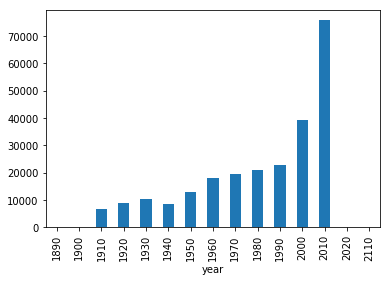

In [5]:
titles.groupby(titles.year // 10 * 10).size().sort_index().plot(kind='bar');

### Use groupby() to plot the number of "Hamlet" films made each decade.

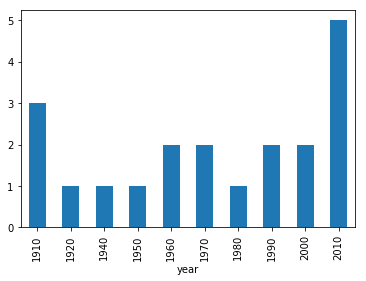

In [6]:
titles[titles.title == 'Hamlet'].groupby(titles.year // 10 * 10).size().sort_index().plot(kind='bar');

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

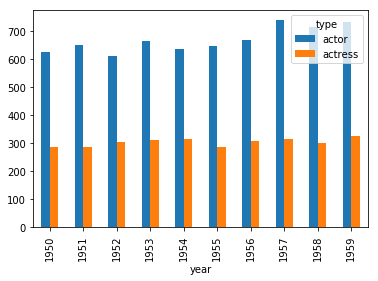

In [7]:
c = cast[(cast.n == 1) & (cast.year // 10 * 10 == 1950)]
c = c.groupby(['type', 'year']).size().unstack(0)
c.plot(kind='bar');

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [8]:
c = cast
c = c[c.n <= 5]
c = c[c.year // 10 * 10 == 1950]
c = c.groupby(['type', 'year', 'n']).size()
c = c.unstack(1)
c

year         1950  1951  1952  1953  1954  1955  1956  1957  1958  1959
type    n                                                              
actor   1.0   625   651   613   664   636   648   668   739   715   733
        2.0   441   461   440   473   415   430   483   489   498   510
        3.0   507   561   544   577   549   564   560   617   596   579
        4.0   535   582   533   578   540   551   557   609   578   600
        5.0   561   582   551   574   524   550   552   607   587   586
actress 1.0   288   285   304   312   316   285   307   315   301   327
        2.0   414   429   444   463   486   459   442   522   484   492
        3.0   320   299   306   319   287   306   309   338   343   374
        4.0   273   255   285   285   249   284   301   320   312   317
        5.0   229   259   235   268   242   259   262   288   275   275

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [9]:
c = cast
c = c[c.title =='The Pink Panther']
c = c.groupby('year').size()
c

year
1963    21
2006    90
dtype: int64

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [10]:
c = cast
c = c[c.name == 'Frank Oz']

t = c.groupby('title').count()
t = t[t.character > 1]
t = t.index

c = c[c.title.isin(t)]
c = c[['title', 'year']]
c = c.drop_duplicates()
c = c.sort_values('year')
c

,title,year
1723645,The Muppet Movie,1979
1723598,An American Werewolf in London,1981
1723632,The Great Muppet Caper,1981
1723629,The Dark Crystal,1982
1723653,The Muppets Take Manhattan,1984
1723601,Follow That Bird,1985
1723638,The Muppet Christmas Carol,1992
1723608,Muppet Treasure Island,1996
1723612,Muppets from Space,1999
1723625,The Adventures of Elmo in Grouchland,1999


In [11]:
c = cast
c = c[c.name == 'Frank Oz']
g = c.groupby(['year', 'title']).size()
g[g > 1]

year  title                               
1979  The Muppet Movie                        8
1981  An American Werewolf in London          2
      The Great Muppet Caper                  6
1982  The Dark Crystal                        2
1984  The Muppets Take Manhattan              7
1985  Follow That Bird                        3
1992  The Muppet Christmas Carol              7
1996  Muppet Treasure Island                  4
1999  Muppets from Space                      4
      The Adventures of Elmo in Grouchland    3
dtype: int64

### List each of the characters that Frank Oz has portrayed at least twice.

In [12]:
c = cast[cast.name == 'Frank Oz']
g = c.groupby('character').size()
g[g > 1].sort_values()

character
Grover            2
Bert              3
Fozzie Bear       4
Cookie Monster    5
Sam the Eagle     5
Animal            6
Miss Piggy        6
Yoda              6
dtype: int64